In [36]:
%pip install --quiet pandas pydub numpy matplotlib librosa seaborn scikit-learn keras 

Note: you may need to restart the kernel to use updated packages.


In [37]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, learning_curve, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, make_scorer, hinge_loss
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

In [38]:
features = pd.read_csv('../caracter_spy.csv')
classes = pd.read_csv('../class_spy.csv')

features

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.nservices,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric
0,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,0,...,389,221,26,24,116,0,121,87,0,8
1,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,0,...,392,222,26,24,118,0,122,87,0,8
2,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,0,...,395,222,26,27,118,0,120,88,0,8
3,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,0,...,395,222,26,27,118,0,120,88,0,8
4,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,0,...,392,222,26,24,118,0,124,87,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20035,39,15,9.358974,0,171.589744,1271,32.589744,6436,195.030303,0,...,385,220,26,23,114,0,115,88,0,8
20036,38,15,9.736842,0,179.815789,1143,39.413793,6554,211.419355,0,...,378,219,26,21,110,0,113,57,0,8
20037,38,15,9.710526,0,180.078947,1143,39.413793,6561,211.645161,0,...,378,219,26,21,110,0,113,57,0,8
20038,38,15,9.578947,0,178.605263,923,34.185185,6501,209.709677,0,...,378,219,26,21,110,0,113,56,0,8


In [39]:
feature_train, feature_test, class_train, class_test = train_test_split(features, classes, test_size=0.20)

# Rede Neural

In [40]:
classifier = Sequential()

In [41]:
scaler = StandardScaler()
previsor_train_normalized = scaler.fit_transform(feature_train)

In [42]:
optmizer_ = Adam(learning_rate=0.001)

In [43]:
classifier.add(Dense(units=15, activation='relu', kernel_initializer='random_uniform',input_dim=55))
classifier.add(Dropout(0.1))
classifier.add(Dense(units=15, activation='relu', kernel_initializer='random_uniform'))
classifier.add(Dense(units=8, activation='relu', kernel_initializer='random_uniform'))
classifier.add(Dense(units=1, activation='sigmoid'))
classifier.compile(optimizer=optmizer_, loss="binary_crossentropy", metrics=['binary_accuracy'])
classifier.fit(feature_train, class_train, batch_size=10, epochs=100)

Epoch 1/100


c:\Users\m31al\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1604/1604 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - binary_accuracy: 0.8637 - loss: 0.2694
Epoch 2/100
1604/1604 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - binary_accuracy: 0.9779 - loss: 0.0877
Epoch 3/100
1604/1604 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - binary_accuracy: 0.9840 - loss: 0.0558
Epoch 4/100
1604/1604 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - binary_accuracy: 0.9822 - loss: 0.0542
Epoch 5/100
1604/1604 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - binary_accuracy: 0.9716 - loss: 0.0723
Epoch 6/100
1604/1604 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - binary_accuracy: 0.9769 - loss: 0.0662
Epoch 7/100
1604/1604 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - binary_accuracy: 0.9822 - loss: 0.0553
Epoch 8/100
1604/1604 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - binary_accuracy: 0.9840 - loss: 0.0484
Epoch 9/100
1604/1604 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - binary_accuracy: 0.9789 - loss: 0.0745
Epoch 10/100
1604/1604 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - binary_accuracy: 0.9839 - loss: 0.0655
Epoch 11/100
1604/1604 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/

In [44]:
predictions = classifier.predict(feature_test)
predictions = (predictions > 0.5)
predictions

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[ True],
       [ True],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [45]:
precision = accuracy_score(class_test, predictions)
precision

0.9955089820359282

In [46]:
print( classification_report(class_test, predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2001
           1       1.00      1.00      1.00      2007

    accuracy                           1.00      4008
   macro avg       1.00      1.00      1.00      4008
weighted avg       1.00      1.00      1.00      4008



Epoch 1/100
1283/1283 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - binary_accuracy: 0.9903 - loss: 0.0472 - val_binary_accuracy: 0.9950 - val_loss: 0.0204
Epoch 2/100
1283/1283 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - binary_accuracy: 0.9903 - loss: 0.0403 - val_binary_accuracy: 0.9950 - val_loss: 0.0226
Epoch 3/100
1283/1283 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - binary_accuracy: 0.9916 - loss: 0.0381 - val_binary_accuracy: 0.9944 - val_loss: 0.0250
Epoch 4/100
1283/1283 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - binary_accuracy: 0.9909 - loss: 0.0421 - val_binary_accuracy: 0.9944 - val_loss: 0.0223
Epoch 5/100
1283/1283 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - binary_accuracy: 0.9907 - loss: 0.0438 - val_binary_accuracy: 0.9941 - val_loss: 0.0223
Epoch 6/100
1283/1283 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - binary_accuracy: 0.9901 - loss: 0.0446 - val_binary_accuracy: 0.9953 - val_loss: 0.0205
Epoch 7/100
1283/1283 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - binary_accuracy: 0.9901 - loss: 0.0414 - val_binary_accuracy: 0.9953 - va

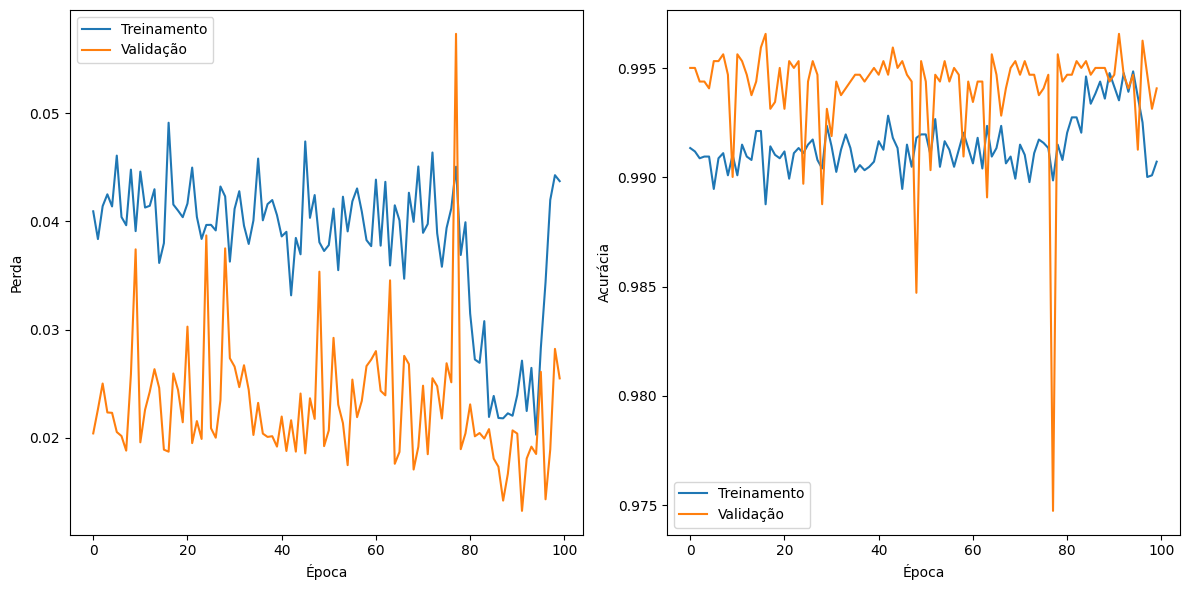

In [47]:
history = classifier.fit(feature_train, class_train, batch_size=10, epochs=100, validation_split=0.2)

train_loss = history.history['loss']
train_accuracy = history.history['binary_accuracy']

if 'val_loss' in history.history and 'val_binary_accuracy' in history.history:
    val_loss = history.history['val_loss']
    val_accuracy = history.history['val_binary_accuracy']


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Treinamento')
if 'val_loss' in history.history:
    plt.plot(val_loss, label='Validação')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()
plt.savefig('lossRNA-BL.png')


plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Treinamento')
if 'val_binary_accuracy' in history.history:
    plt.plot(val_accuracy, label='Validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.savefig('accuracyRNA-BL.png')

plt.tight_layout()
plt.show()

In [48]:
predictions = classifier.predict(feature_test)
predictions = (predictions > 0.5)
predictions

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[ True],
       [ True],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [49]:
precision = accuracy_score(class_test, predictions)
precision

0.9935129740518962

In [50]:
matriz = confusion_matrix(class_test, predictions)

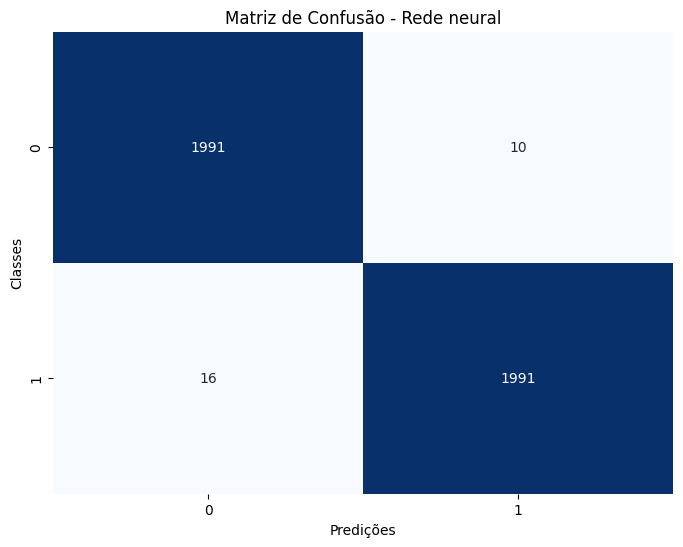

In [51]:
plt.figure(figsize=(8,6))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predições')
plt.ylabel('Classes')
plt.title('Matriz de Confusão - Rede neural')
plt.savefig('matrizRNA-BL.png')
plt.show()


In [52]:
num_folds = 5

kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

acuracias = []

for fold, (train_index, test_index) in enumerate(kf.split(feature_train, class_train)):
    print(f"\nFold {fold + 1}/{num_folds}")

    train_index = list(train_index)
    test_index = list(test_index)


    feature_train_fold, feature_test_fold = feature_train.iloc[train_index], feature_train.iloc[test_index]
    class_train_fold, class_test_fold = class_train.iloc[train_index], class_train.iloc[test_index]

    classifier.fit(feature_train_fold, class_train_fold, batch_size=10, epochs=100, verbose=0)

    previsoes_teste = (classifier.predict(feature_test_fold) > 0.5).astype(int)

    acuracia = accuracy_score(class_test_fold, previsoes_teste)
    acuracias.append(acuracia)


    print(f'Acurácia da rede neural no Fold {fold + 1}: {acuracia}')

media_acuracias = np.mean(acuracias)
print(f"\nMédia das Acurácias: {media_acuracias}")


Fold 1/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Acurácia da rede neural no Fold 1: 0.9956345494231369

Fold 2/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Acurácia da rede neural no Fold 2: 0.9937636420330527

Fold 3/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Acurácia da rede neural no Fold 3: 0.9956331877729258

Fold 4/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Acurácia da rede neural no Fold 4: 0.9984404242046163

Fold 5/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Acurácia da rede neural no Fold 5: 0.9975046787273861

Média das Acurácias: 0.9961952964322236


# Árvore de decisão

In [53]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(feature_train, class_train)

DecisionTreeClassifier()

In [54]:
prediction_DT = decision_tree.predict(feature_test)

In [55]:
accuracy_DT = accuracy_score(class_test, prediction_DT)
print(f'Acurácia da árvore de decisão:{accuracy_DT}')

Acurácia da árvore de decisão:1.0


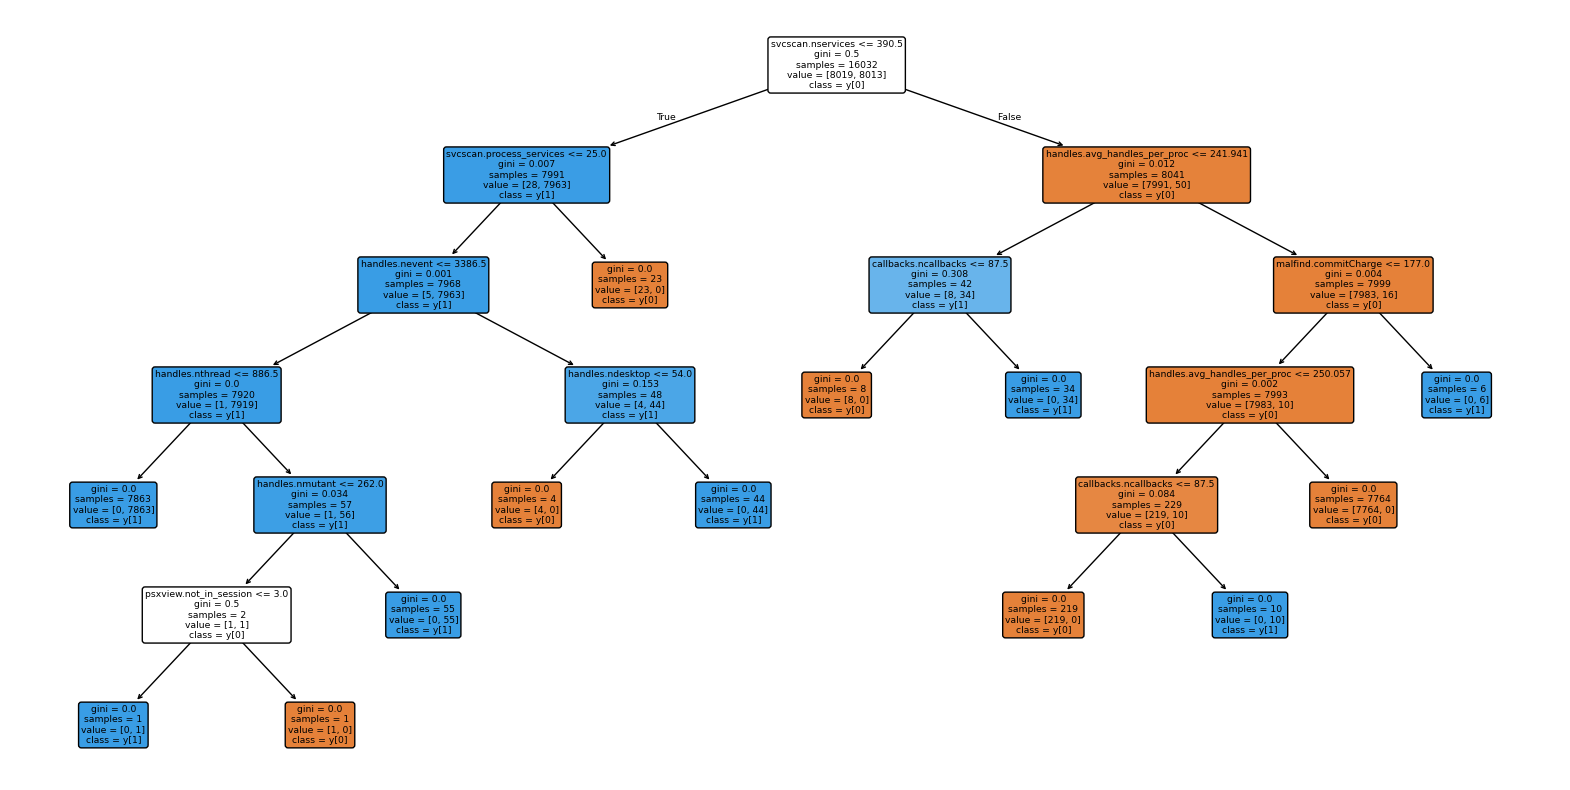

In [56]:
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, filled=True, feature_names=feature_train.columns, class_names=True, rounded=True)
plt.savefig('arvore-BL.png')
plt.show()

In [57]:
tree_rules = export_text(decision_tree, feature_names=feature_train.columns.tolist())
print(tree_rules)

|--- svcscan.nservices <= 390.50
|   |--- svcscan.process_services <= 25.00
|   |   |--- handles.nevent <= 3386.50
|   |   |   |--- handles.nthread <= 886.50
|   |   |   |   |--- class: 1
|   |   |   |--- handles.nthread >  886.50
|   |   |   |   |--- handles.nmutant <= 262.00
|   |   |   |   |   |--- psxview.not_in_session <= 3.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- psxview.not_in_session >  3.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- handles.nmutant >  262.00
|   |   |   |   |   |--- class: 1
|   |   |--- handles.nevent >  3386.50
|   |   |   |--- handles.ndesktop <= 54.00
|   |   |   |   |--- class: 0
|   |   |   |--- handles.ndesktop >  54.00
|   |   |   |   |--- class: 1
|   |--- svcscan.process_services >  25.00
|   |   |--- class: 0
|--- svcscan.nservices >  390.50
|   |--- handles.avg_handles_per_proc <= 241.94
|   |   |--- callbacks.ncallbacks <= 87.50
|   |   |   |--- class: 0
|   |   |--- callbacks.ncallbacks >  87.50
|   |   | 

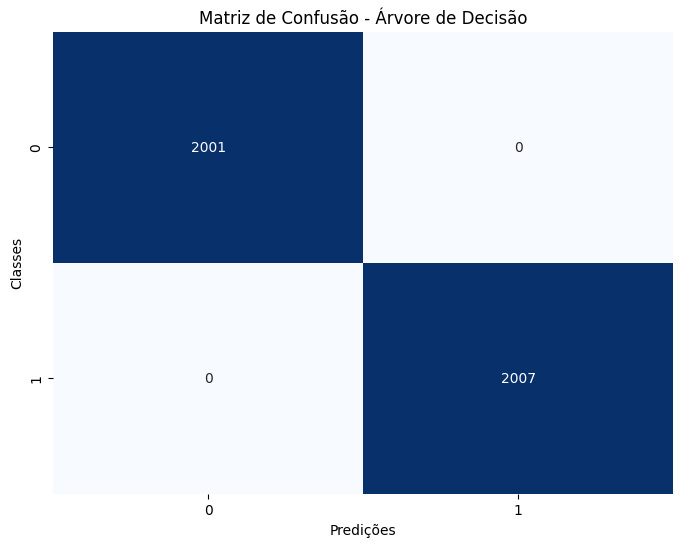

In [58]:
matriz_DT = confusion_matrix(class_test, prediction_DT)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_DT, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predições')
plt.ylabel('Classes')
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.savefig('matrizdeconfusaoDT-BL.png')
plt.show()

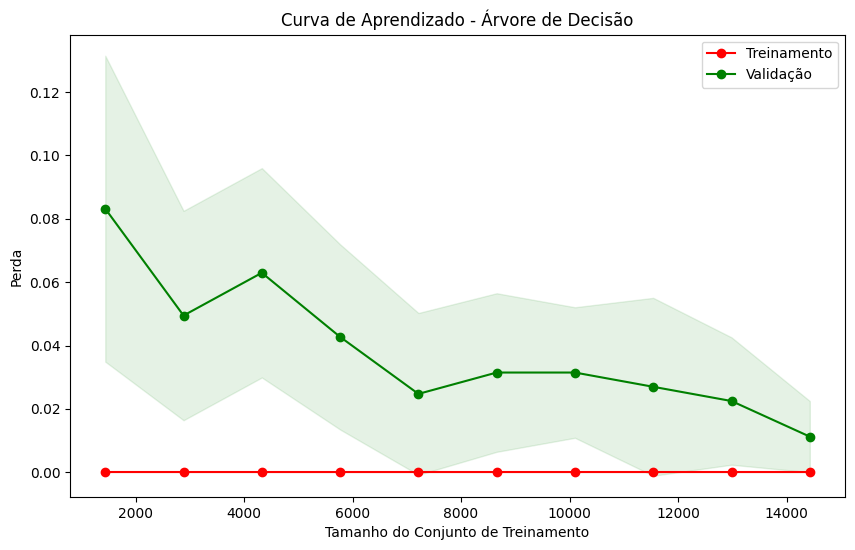

In [59]:
train_sizes, train_scores, test_scores = learning_curve(decision_tree, feature_train, class_train, cv=10, scoring='neg_log_loss', train_sizes=np.linspace(0.1, 1.0, 10))


train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Treinamento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validação")
plt.xlabel("Tamanho do Conjunto de Treinamento")
plt.ylabel("Perda")
plt.legend(loc="best")
plt.title("Curva de Aprendizado - Árvore de Decisão")
plt.savefig('LosseAD-BL.png')
plt.show()

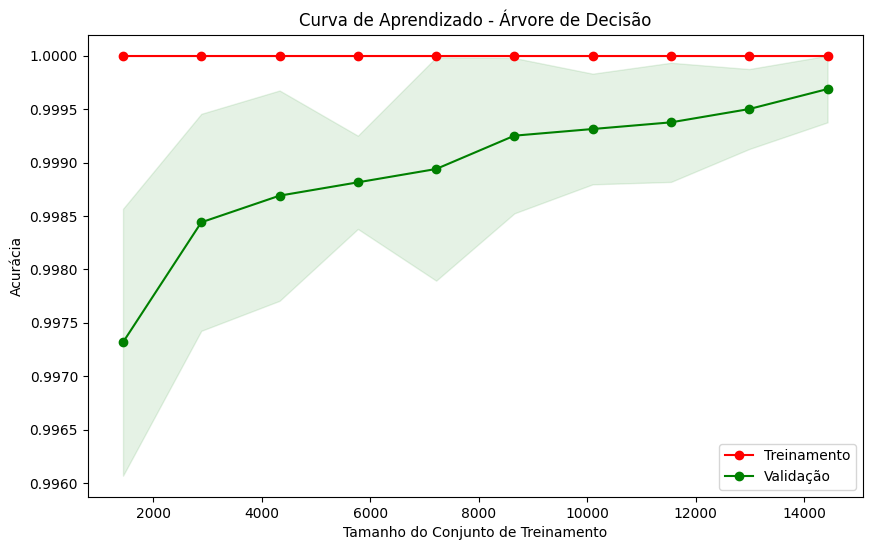

In [60]:
train_sizes, train_scores, test_scores = learning_curve(decision_tree, feature_train, class_train, cv=10, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))


train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Treinamento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validação")
plt.xlabel("Tamanho do Conjunto de Treinamento")
plt.ylabel("Acurácia")
plt.legend(loc="best")
plt.title("Curva de Aprendizado - Árvore de Decisão")
plt.savefig('acuraciaAD-Bl.png')
plt.show()

 K-Fold

In [61]:
num_folds = 5

kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

acuracias = []

for fold, (train_index, test_index) in enumerate(kf.split(feature_train, class_train)):
    print(f"\nFold {fold + 1}/{num_folds}")

    train_index = list(train_index)
    test_index = list(test_index)

    feature_train_fold, feature_test_fold = feature_train.iloc[train_index], feature_train.iloc[test_index]
    class_train_fold, class_test_fold = class_train.iloc[train_index], class_train.iloc[test_index]


    decision_tree.fit(feature_train_fold, class_train_fold)

    prediction_DT = decision_tree.predict(feature_test_fold)

    acuracia = accuracy_score(class_test_fold, prediction_DT)
    acuracias.append(acuracia)

    print(f'Acurácia da Árvore de Decisão no Fold {fold + 1}: {acuracia}')

media_acuracias = np.mean(acuracias)
print(f"\nMédia das Acurácias: {media_acuracias}")


Fold 1/5
Acurácia da Árvore de Decisão no Fold 1: 1.0

Fold 2/5
Acurácia da Árvore de Decisão no Fold 2: 0.9993763642033052

Fold 3/5
Acurácia da Árvore de Decisão no Fold 3: 0.9987523393636931

Fold 4/5
Acurácia da Árvore de Decisão no Fold 4: 0.9996880848409233

Fold 5/5
Acurácia da Árvore de Decisão no Fold 5: 1.0

Média das Acurácias: 0.9995633576815843


# Naive Bayes

In [62]:
naive_bayes = GaussianNB()
naive_bayes.fit(feature_train, class_train)

c:\Users\m31al\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [63]:
prediction_NB = naive_bayes.predict(feature_test)

In [64]:
accuracyNB = accuracy_score(class_test, prediction_NB)
print(f'Acurácia Naive Bayes:{accuracyNB}')

Acurácia Naive Bayes:0.9900199600798403


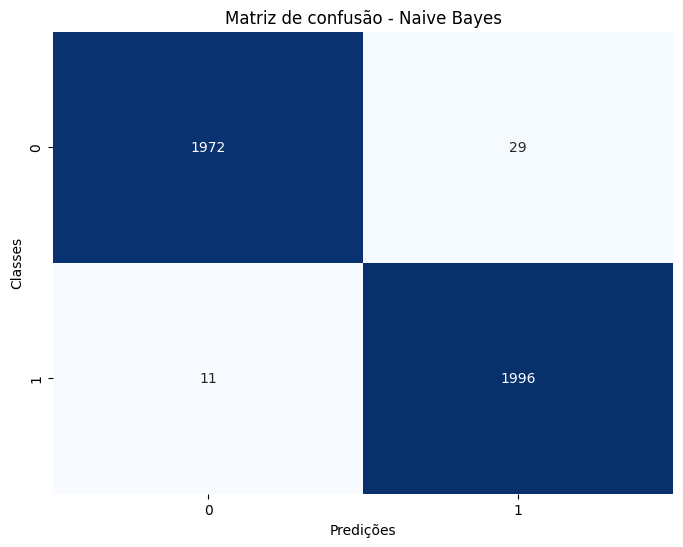

In [65]:
matriz_NB = confusion_matrix(class_test, prediction_NB)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_NB, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predições')
plt.ylabel('Classes')
plt.title('Matriz de confusão - Naive Bayes')
plt.savefig('matrizdeconfusaoNB-BL.png')
plt.show()

c:\Users\m31al\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\m31al\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\m31al\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\m31al\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1408: DataC

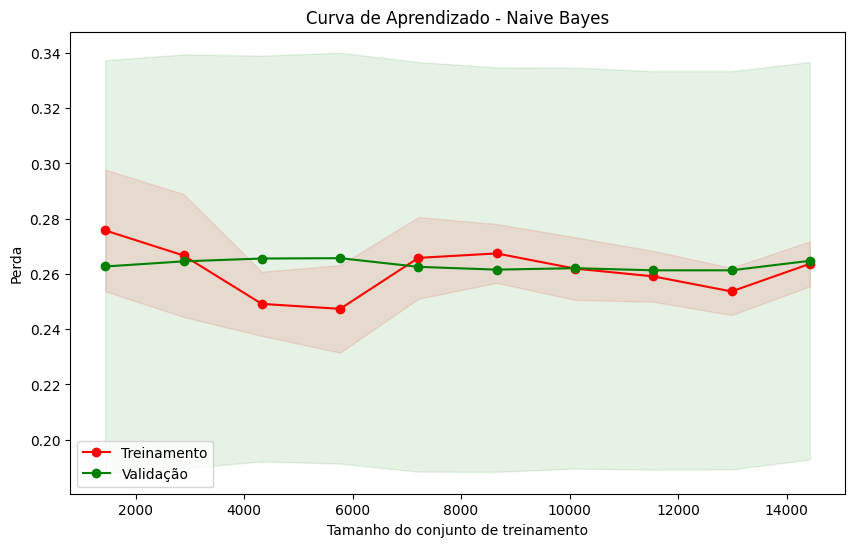

In [66]:
train_sizes, train_scores, test_scores = learning_curve(naive_bayes, feature_train, class_train, cv=10, scoring='neg_log_loss', train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Treinamento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validação")
plt.xlabel("Tamanho do conjunto de treinamento")
plt.ylabel("Perda")
plt.legend(loc="best")
plt.title("Curva de Aprendizado - Naive Bayes")
plt.savefig('LosseNB-BL.png')
plt.show()

c:\Users\m31al\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\m31al\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\m31al\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\m31al\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1408: DataC

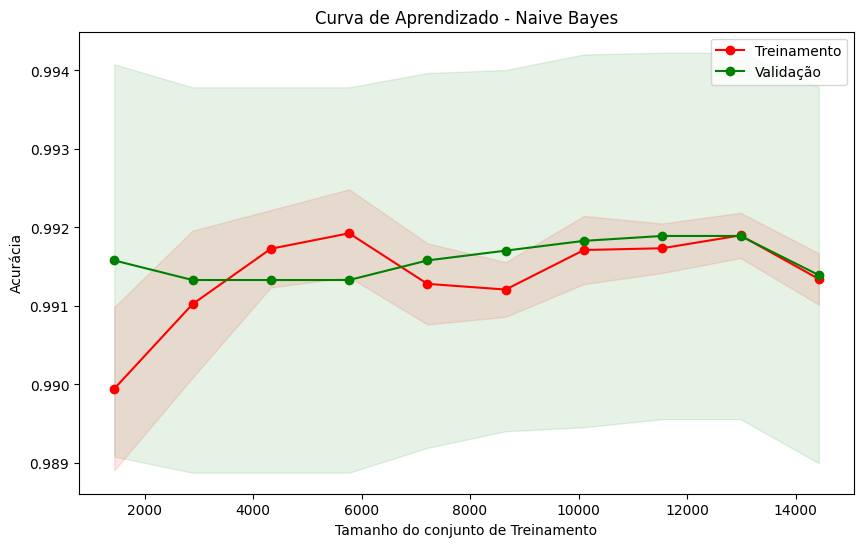

In [67]:
train_sizes, train_scores, test_scores = learning_curve(naive_bayes, feature_train, class_train, cv=10, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))


train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Treinamento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validação")
plt.xlabel("Tamanho do conjunto de Treinamento")
plt.ylabel("Acurácia")
plt.legend(loc="best")
plt.title("Curva de Aprendizado - Naive Bayes")
plt.savefig('acuraciaNB-BL.png')
plt.show()

In [68]:
num_folds = 5

kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)


acuracias = []


for fold, (train_index, test_index) in enumerate(kf.split(feature_train, class_train)):
    print(f"\nFold {fold + 1}/{num_folds}")


    train_index = list(train_index)
    test_index = list(test_index)


    feature_train_fold, feature_test_fold = feature_train.iloc[train_index], feature_train.iloc[test_index]
    class_train_fold, class_test_fold = class_train.iloc[train_index], class_train.iloc[test_index]


    naive_bayes.fit(feature_train_fold, class_train_fold.values.ravel())


    prediction_NB = naive_bayes.predict(feature_test_fold)

    acuracia = accuracy_score(class_test_fold, prediction_NB)
    acuracias.append(acuracia)

    print(f'Acurácia do Naive Bayes no Fold {fold + 1}: {acuracia}')

media_acuracias = np.mean(acuracias)
print(f"\nMédia das Acurácias: {media_acuracias}")


Fold 1/5
Acurácia do Naive Bayes no Fold 1: 0.9890863735578422

Fold 2/5
Acurácia do Naive Bayes no Fold 2: 0.9915809167446211

Fold 3/5
Acurácia do Naive Bayes no Fold 3: 0.9912663755458515

Fold 4/5
Acurácia do Naive Bayes no Fold 4: 0.991890205864005

Fold 5/5
Acurácia do Naive Bayes no Fold 5: 0.9915782907049283

Média das Acurácias: 0.9910804324834498


# SVM

In [69]:
svm = SVC(kernel='linear', random_state=1, C=0.1)
svm.fit(feature_train, class_train)

c:\Users\m31al\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1, kernel='linear', random_state=1)

In [70]:
predictions_svm = svm.predict(feature_test)

In [71]:
accuracy_svm = accuracy_score(class_test, predictions_svm)
print(f'Acurácia SVM:{accuracy_svm}')

Acurácia SVM:0.999001996007984


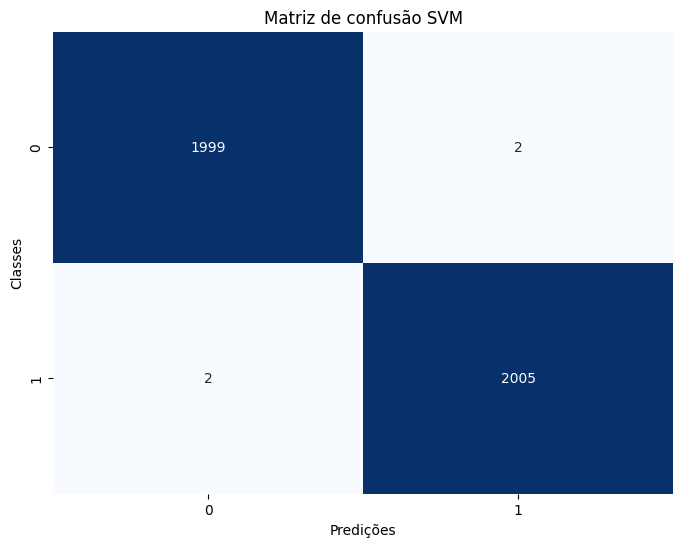

In [72]:
matriz_svm = confusion_matrix(class_test, predictions_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predições')
plt.ylabel('Classes')
plt.title('Matriz de confusão SVM')
plt.savefig('matrizdeconfusaoSVM-BL.png')
plt.show()

c:\Users\m31al\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\m31al\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\m31al\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\m31al\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1408: DataC

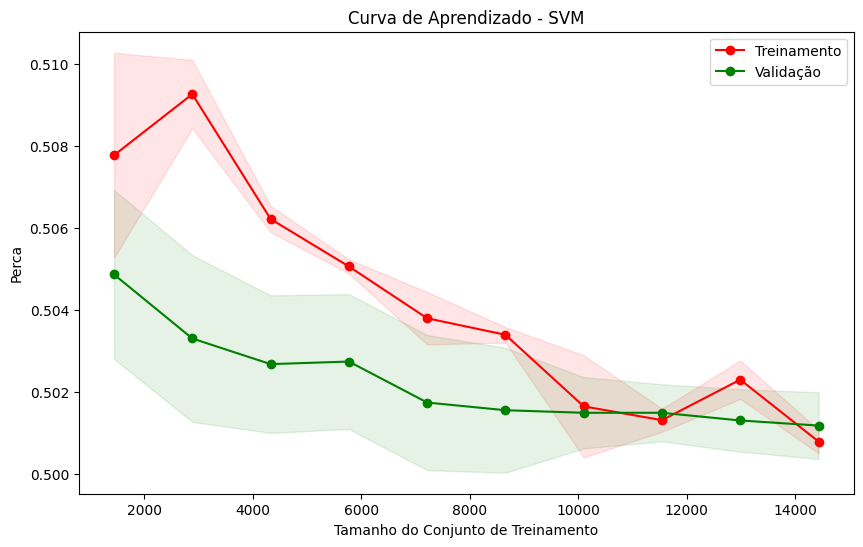

In [73]:
hinge_loss_scorer = make_scorer(hinge_loss, greater_is_better=False)
train_sizes, train_scores, test_scores = learning_curve(svm, feature_train, class_train, cv=10, scoring=hinge_loss_scorer, train_sizes=np.linspace(0.1, 1.0, 10))


train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Treinamento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validação")
plt.xlabel("Tamanho do Conjunto de Treinamento")
plt.ylabel("Perca")
plt.legend(loc="best")
plt.title("Curva de Aprendizado - SVM")
plt.savefig('LosseSVM-BL.png')
plt.show()

c:\Users\m31al\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\m31al\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\m31al\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\m31al\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1408: DataC

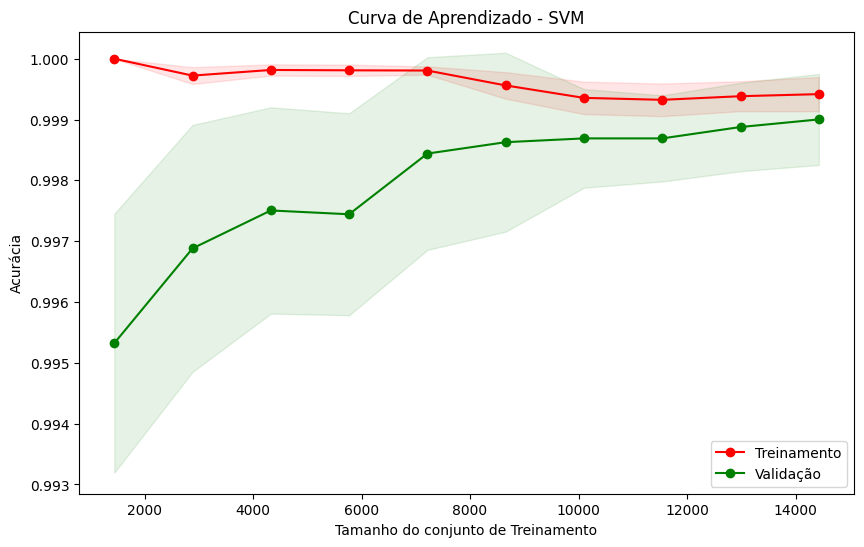

In [74]:
train_sizes, train_scores, test_scores = learning_curve(svm, feature_train, class_train, cv=10, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Treinamento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validação")
plt.xlabel("Tamanho do conjunto de Treinamento")
plt.ylabel("Acurácia")
plt.legend(loc="best")
plt.title("Curva de Aprendizado - SVM")
plt.savefig('acuraciaSVM-BL.png')
plt.show()

In [76]:
num_folds = 5


kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

acuracias = []


for fold, (train_index, test_index) in enumerate(kf.split(feature_train, class_train)):
    print(f"\nFold {fold + 1}/{num_folds}")


    train_index = list(train_index)
    test_index = list(test_index)


    feature_train_fold, feature_test_fold = feature_train.iloc[train_index], feature_train.iloc[test_index]
    class_train_fold, class_test_fold = class_train.iloc[train_index], class_train.iloc[test_index]


    svm.fit(feature_train_fold, class_train_fold.values.ravel())


    predictions_svm = svm.predict(feature_test_fold)


    acuracia = accuracy_score(class_test_fold, predictions_svm)
    acuracias.append(acuracia)


    print(f'Acurácia do SVM no Fold {fold + 1}: {acuracia}')


media_acuracias = np.mean(acuracias)
print(f"\nMédia das Acurácias: {media_acuracias}")


Fold 1/5
Acurácia do SVM no Fold 1: 0.9990645463049579

Fold 2/5
Acurácia do SVM no Fold 2: 0.9984409105082632

Fold 3/5
Acurácia do SVM no Fold 3: 0.9984404242046163

Fold 4/5
Acurácia do SVM no Fold 4: 0.9990642545227698

Fold 5/5
Acurácia do SVM no Fold 5: 0.9996880848409233

Média das Acurácias: 0.9989396440763061


In [14]:
%pip install shap

In [15]:
import  shap

c:\Users\m31al\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using 1000 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 4008/4008 [1:15:08<00:00,  1.12s/it]


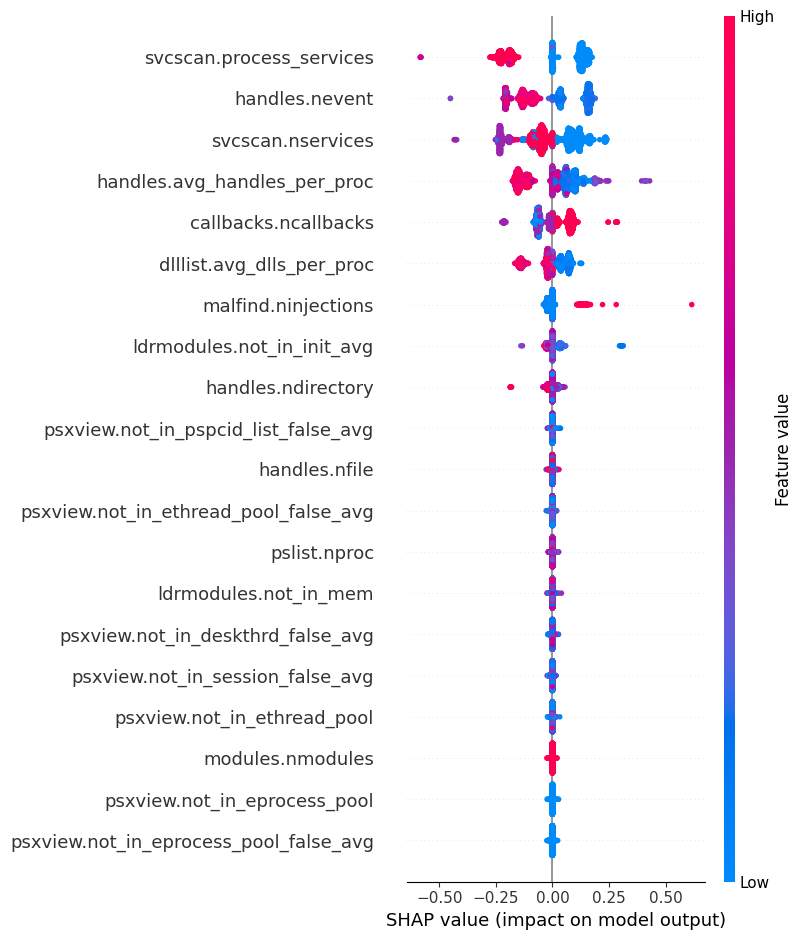

In [18]:
K = 1000
background_samples = shap.sample(feature_train, K)
explainer = shap.KernelExplainer(decision_tree.predict, background_samples)
shap_values = explainer.shap_values(feature_test)
shap.summary_plot(shap_values, feature_test)